In [1]:
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

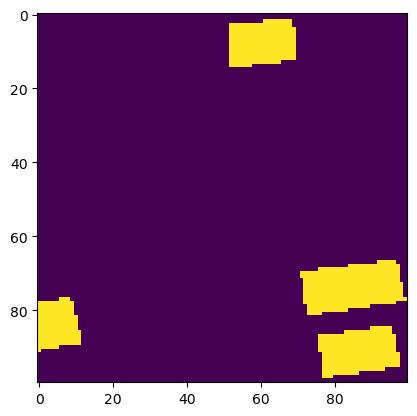

In [3]:
from gtkit.imgops import georead
img_obj = georead(r"img.tiff")
plt.imshow(img_obj.read()[0])

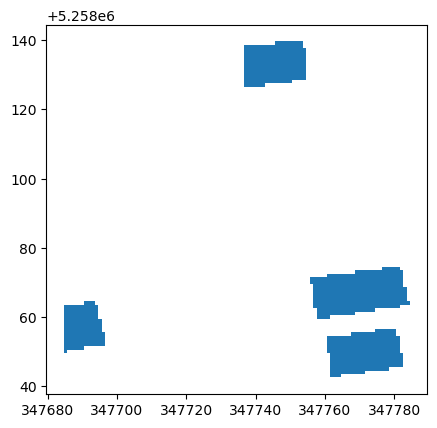

In [10]:
from gtkit.imgops import obj_to_shp_gen
import pandas as pd

gdf_list = []
for geom in obj_to_shp_gen(img_obj):
    # Create a GeoDataFrame with the geometry and properties
    gdf = gpd.GeoDataFrame(geom, crs=img_obj.crs)
    
    # Append the GeoDataFrame to the list
    gdf_list.append(gdf)

# Concatenate all GeoDataFrames into a single GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=img_obj.crs)

# Plot all geometries
merged_gdf.plot()
plt.show()